## **LGBM Workflow example**

This project uses **LightGBM (LGBMClassifier)** — a gradient boosting framework optimized for speed and performance — to classify outcomes based on engineered features from historical sports data.

### 🧠 What is LGBMClassifier?
`LGBMClassifier` is a machine learning model from the LightGBM library designed for **efficient gradient boosting on decision trees**. It’s particularly suited for classification tasks with structured/tabular data.

Key features:

- Fast training speed and low memory usage.

- Built-in support for categorical features.

- Excellent performance with small feature sets (like percent_over in this project).

- Handles imbalanced data well.

- Supports parallel and GPU learning.

### ✅ Why use it for this project?
In this sports outcome prediction case, we’re working with:

- Simple, structured features (percent_over, etc.).

- Binary classification (OVER vs UNDER).

- Medium-sized datasets (~50,000 rows).

- The need for quick retraining and cross-validation.

**LightGBM is ideal here** because:

- It provides high accuracy with minimal tuning.

- It’s very fast, making it suitable for daily retraining.




### **Train Model**

In [8]:
import sys
sys.path.insert(0, '../../')

import os
import json
from lightgbm import LGBMClassifier

from src.utils.load import load_to_df, prepare_training_data
from src.globals import DEFAULT_PARAMS

### **Load data**

In [5]:
# Training data path
historical_data_path = "../../data/training/aHistorical_01012024_02142025.xlsx"
params_path = "../../data/best_params.json"

# Load the data and split it into features and labels
df = load_to_df(historical_data_path)
data = prepare_training_data(df)
X = data[["percent_over"]]
y = data["label"]

# Load hyperparameters if provided
if os.path.exists(params_path):
    with open(params_path, "r") as f:
        params = json.load(f)
    print(f"Using hyperparameters from {params_path}")
else:
    params = DEFAULT_PARAMS
    print("Using default hyperparameters")

Using hyperparameters from ../../data/best_params.json


### **Train the model**

In [6]:
model = LGBMClassifier(
    **params,
    verbose=-1
)
# Train the model
print("Training the model...")
model.fit(X, y)

Training the model...


LGBMClassifier(colsample_bytree=0.6, learning_rate=0.01, max_depth=5,
               n_estimators=200, num_leaves=15, subsample=0.6, verbose=-1)

### **Validate the trained model**

In [14]:
from src.utils.plots import plot_confusion_matrix

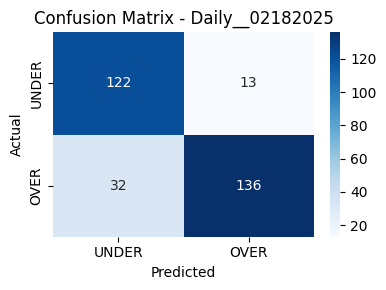

In [22]:
test_path = "../../data/tests/Daily__02182025.xlsx"
raw_data = load_to_df(test_path)
processed_data = prepare_training_data(raw_data)
# Prepare the test data
X_test = processed_data[["percent_over"]]
y_test = processed_data["label"]
# Make predictions
y_pred = model.predict(X_test)
# Evaluate the model
plot_confusion_matrix(y_test, y_pred, os.path.basename(test_path).split(".")[0])

### Test over a set of tests for further validation

In [13]:
test_dir = "../../data/tests/"

for test in os.listdir(test_dir):
    if test.endswith(".xlsx"):
        print(f"Testing {test}...", end=" ")
        test_df = load_to_df(os.path.join(test_dir, test))
        test_data = prepare_training_data(test_df)
        X_test = test_data[["percent_over"]]
        y_test = test_data["label"]
        y_pred = model.predict(X_test)
        accuracy = (y_pred == y_test).mean()
        print(f"Accuracy: {accuracy:.2f}")

Testing Daily__02152025.xlsx... Accuracy: 0.87
Testing Daily__02162025.xlsx... Accuracy: 0.90
Testing Daily__02172025.xlsx... Accuracy: 0.90
Testing Daily__02182025.xlsx... Accuracy: 0.85
Testing Daily__02192025.xlsx... Accuracy: 0.94
Testing Daily__02202025.xlsx... Accuracy: 0.94
Testing Daily__02212025.xlsx... Accuracy: 0.88
Testing Daily__02222025.xlsx... Accuracy: 0.82
Testing Daily__02232025.xlsx... Accuracy: 0.94
Testing Daily__02242025.xlsx... Accuracy: 0.90
